# Section:  Approximating functions - Lecture 2

## [2] Polynomial interpolation

Continue our discussion from the last Lecture, we would like to represent a function nicely by a polynomial. 
By "nicely" we mean that the error between the function and the polynomial is small.

Given a function $f(x)$, and a polynomial interpolation $p(x)$, we can define the error, the so-called infinity-norm, as 
$$\|f(x)-p(x)\|_{\infty} = \sup_{x}|f(x)-p(x)|.$$
According to Weierstrass Approximation Theorem, there must exists some polynomial $p(x)$ such that the error is small if $f$ is continous.

But how can we construct this polynomial? A simple answer is that we just choose $n+1$ points on the interval and interpolate a polynomial that passes through these $n+1$ data points, and hopefully, the error will decrease as we choose more and more points.

In the following we try to interpolate some functions using various node and see if some of them is better than others.

### [2.1] Random Nodes
Consider a function $f$ on $[-1, 1]$, we interpolate the function on randomly selected nodes, 
$$x_k, \quad k=0,1,2,\cdots,n,$$ 
by a polynomial $p(x)$. Then, $p(x)$ is a $n$th-degree polynomial that has value $p(x_k)=f(x_k)$ at $x_k$ for each $k$.

### Example 1
We now try to interpolate $f(x) = \cos(x^3)$ on $[-1,1]$ at randomly selected nodes.

<font color="red">**To be done**</font>
1. Write a function that choose $n+1$ random points on [-1, 1] and interpolate f(x) at these points by a polynomial
2. Show the results for $n=5$, $10$ and $20$.

### [2.2] Equially spaced Nodes
Consider a function $f$ on $[-1, 1]$, we interpolate the function on equally spaced nodes 
$$x_k = -1 + 2\frac{k}{n} \quad k=0,1,2,\cdots,n,$$
by a polynomial $p(x)$. Then, $p(x)$ is a $n$th-degree polynomial that has value $p(x_k)=f(x_k)$ at $x_k$ for each $k$.

### Example 2
We now try to interpolate $f(x) = \cos(x^3)$ on $[-1,1]$ at equally spaced nodes.

<font color="red">**To be done**</font>
1. Write a function that choose $n+1$ equally spaced points on [-1, 1] and interpolate f(x) at these points by a polynomial
2. Show the results for $n=5$, $10$ and $20$.

#### Remark:
One should note that, equally spaced nodes is not a good choice of interpolating a function as there will be oscilations at the edge of the interval, the so-called **Runge's phenomenon**. See [wiki](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) for fruther details.

### [2.3] Chebyshev Nodes of the first kind

Consider polynomial interpolation of some function $f$ on $[-1, 1]$ using Chebyshev Nodes of the first kind:
$$x_k = \cos\left(\frac{2k-1}{2n}\pi\right) \quad k=1,2,\cdots,n.$$
Then, construct $p(x)$ by determinating the $n-1$ degree polynomial that has value $f(x_k)$ at $x_k$ for each $k$.

### Example 3
We now try to interpolate $f(x) = \cos(x^3)$ on $[-1,1]$ at Chebyshev Nodes of the first kind.

<font color="red">**To be done**</font>: Modify the following two codes a bit.
1. Write a function that choose $n$ Chebyshev Nodes of the first kind on [-1, 1] and interpolate f(x) at these points by a polynomial
2. Show the results for $n=5$, $10$.

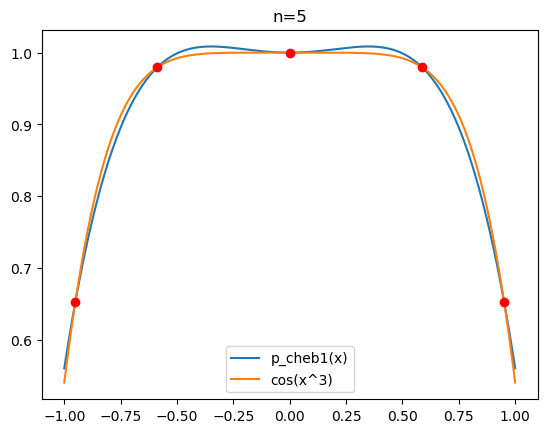

Max. error=0.019729067083358864


In [25]:
using LinearAlgebra
using PyPlot

# Consturct Nodes
n=5;
xi_cheb = cos.(((1:n).-0.5)*pi/n);
f_cheb = cos.(xi_cheb.^3);

# Calculate Coefficenits of polynomial
A=zeros(n,n);
for i=1:n
    A[:,i] = xi_cheb.^(n-i)
end
c = A\f_cheb;

# Construct polynomial
x3 = range(-1,stop=1,length=1000);
p_cheb=zeros(1000);
for i=1:n
    p_cheb += c[i].*x3.^(n-i)
end
plot(x3, p_cheb,label="p_cheb1(x)");
plot(x3, cos.(x3.^3),label="cos(x^3)");
plot(xi_cheb, f_cheb,"or");
plt.legend();
plt.title("n=5")
println("Max. error=",maximum(abs.(p_cheb-cos.(x3.^3))));

Now let us try 10 nodes.

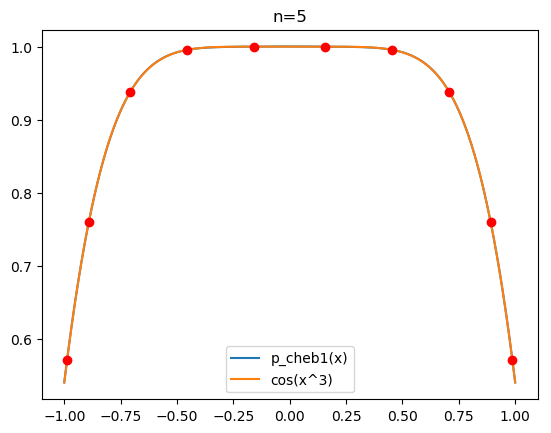

Max. error=0.0002335758520978226


In [26]:
# Consturct Nodes
n=10;
xi_cheb = cos.(((1:n).-0.5)*pi/n);
f_cheb = cos.(xi_cheb.^3);

# Calculate Coefficenits of polynomial
A=zeros(n,n);
for i=1:n
    A[:,i] = xi_cheb.^(n-i)
end
c = A\f_cheb;

# Construct polynomial
x3 = range(-1,stop=1,length=1000);
p_cheb=zeros(1000);
for i=1:n
    p_cheb += c[i].*x3.^(n-i)
end
plot(x3, p_cheb,label="p_cheb1(x)");
plot(x3, cos.(x3.^3),label="cos(x^3)");
plot(xi_cheb, f_cheb,"or");
plt.legend();
plt.title("n=5")
println("Max. error=",maximum(abs.(p_cheb-cos.(x3.^3))));

### [2.4] Chebyshev Nodes of the second kind

Consider polynomial interpolation of some function $f$ on $[-1, 1]$ using Chebyshev Nodes of the second kind:
$$x_k = \cos\left(\frac{k}{n}\pi\right) \quad k=0,1,2,\cdots,n.$$
Then, construct $p(x)$ by determinating the $n$-th degree polynomial that has value $f(x_k)$ at $x_k$ for each $k$.

#### Remark: 
The most important difference between the Chebyshev nodes of the first and the second kind is that the second one includes boundary points, while the first one does not.

### Example 4
We now try to interpolate $f(x) = \cos(x^3)$ on $[-1,1]$ at Chebyshev Nodes of the second kind.

<font color="red">**To be done**</font>: Modify the following two codes a bit.
1. Write a function that choose $n$ Chebyshev Nodes of the first kind on [-1, 1] and interpolate f(x) at these points by a polynomial
2. Show the results for $n=5$, $10$.

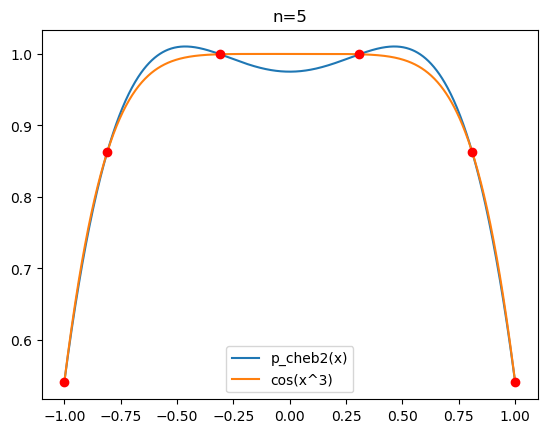

Max. error=0.024793616060573065


In [27]:
# Consturct Nodes
n=6;
xi_cheb = cos.((0:n-1)*pi/(n-1));
f_cheb = cos.(xi_cheb.^3);

# Calculate Coefficenits of polynomial
A=zeros(n,n);
for i=1:n
    A[:,i] = xi_cheb.^(n-i)
end
c = A\f_cheb;

# Construct polynomial
x3 = range(-1,stop=1,length=1000);
p_cheb=zeros(1000);
for i=1:n
    p_cheb += c[i].*x3.^(n-i)
end
plot(x3, p_cheb,label="p_cheb2(x)");
plot(x3, cos.(x3.^3),label="cos(x^3)");
plot(xi_cheb, f_cheb,"or");
plt.legend();
plt.title("n=5")
println("Max. error=",maximum(abs.(p_cheb-cos.(x3.^3))));

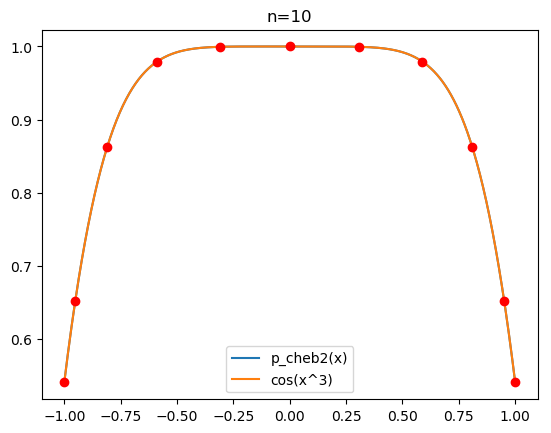

Max. error=2.452796843444016e-5


In [28]:
# Consturct Nodes
n=11;
xi_cheb = cos.((0:n-1)*pi/(n-1));
f_cheb = cos.(xi_cheb.^3);

# Calculate Coefficenits of polynomial
A=zeros(n,n);
for i=1:n
    A[:,i] = xi_cheb.^(n-i)
end
c = A\f_cheb;

# Construct polynomial
x3 = range(-1,stop=1,length=1000);
p_cheb=zeros(1000);
for i=1:n
    p_cheb += c[i].*x3.^(n-i)
end
plot(x3, p_cheb,label="p_cheb2(x)");
plot(x3, cos.(x3.^3),label="cos(x^3)");
plot(xi_cheb, f_cheb,"or");
plt.legend();
plt.title("n=10")
println("Max. error=",maximum(abs.(p_cheb-cos.(x3.^3))));

## Conclusion

So far we have show examples of using several different nodes to interpolate a function. Some of them are good and some of them are bad. However, is there a good way to design or to determine what kind of nodes is good or bad? That will be the topic of the next lecture.